In [16]:
import pandas as pd 
import numpy as np 
import os 
import warnings
import matplotlib.pyplot as plt 
from plotnine import *
import seaborn as sns
import joypy
from matplotlib import cm,colors

# 中文乱码解决方法
plt.rcParams['font.family'] = ['Microsoft YaHei','SimHei','sans-serif']
plt.rcParams['axes.unicode_minus'] = False


warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Dry_Bean_Dataset.xlsx')
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## 探索性分析

In [3]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


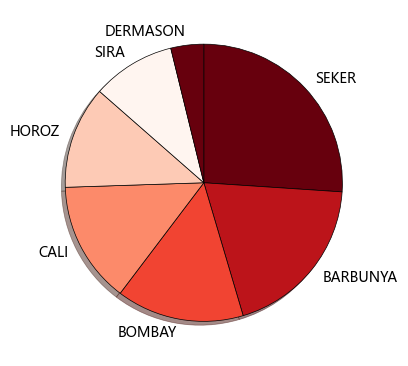

In [20]:
#设置颜色
cmap=cm.get_cmap('Reds_r',6)
color=[colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)] 

#饼图
fig, ax = plt.subplots(figsize=(9, 4.5), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(data['Class'].value_counts(), labels = data['Class'].unique(),
                       startangle=90, shadow=True, counterclock=False,colors=color,
                       wedgeprops =dict(linewidth=0.5, edgecolor='k'))

plt.show()

<AxesSubplot: xlabel='MajorAxisLength', ylabel='MinorAxisLength'>

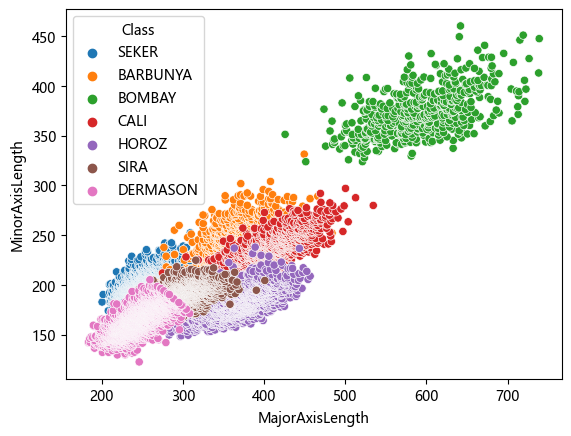

In [4]:
sns.scatterplot(data,x='MajorAxisLength',y='MinorAxisLength',hue='Class')

<AxesSubplot: xlabel='Class', ylabel='Perimeter'>

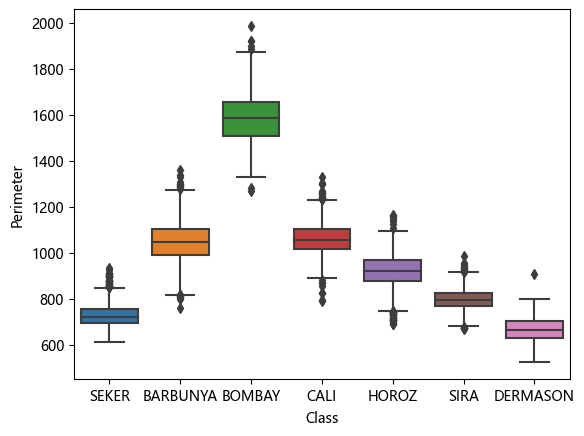

In [7]:
sns.boxplot(data,x='Class',y='Perimeter')

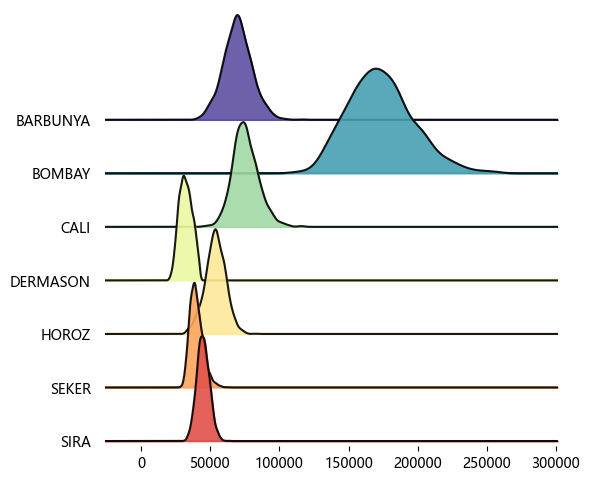

In [14]:
data['class'] = pd.Categorical(data['Class'], ordered=True)
fig, axes = joypy.joyplot(data, column=['Area'], 
                          by="class", ylim='own',colormap=cm.Spectral_r,
                          alpha= 0.9,figsize=(6,5))

In [21]:
from pandas.plotting import radviz

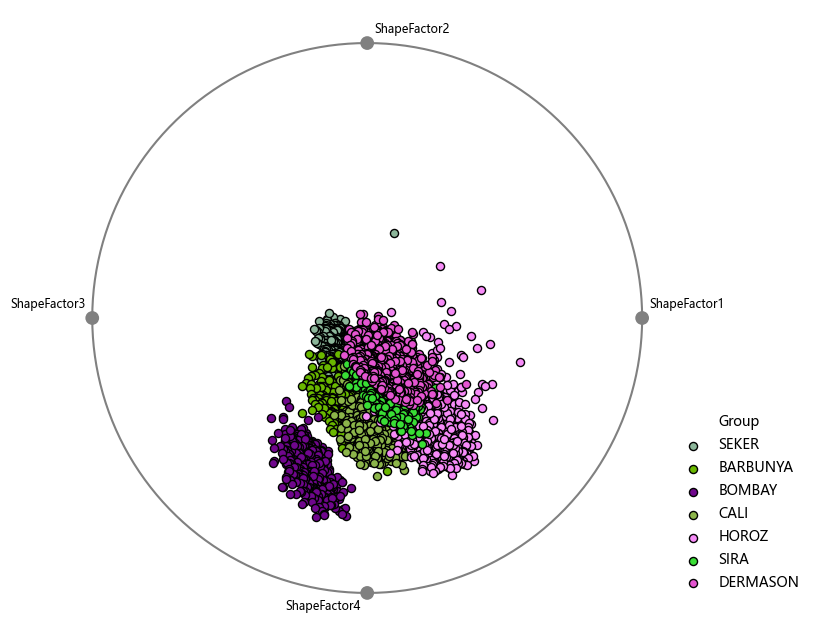

In [28]:
angle=np.arange(360)/180*3.14159
x=np.cos(angle)
y=np.sin(angle)

fig = plt.figure(figsize=(8,8), dpi=100)
ax = radviz(data[['ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4','Class']], 'Class',
            edgecolors='k',marker='o',s=34,linewidths=1)
plt.plot(x,y,color='gray')
plt.axis('off')
plt.legend(loc="center",bbox_to_anchor=(1.1, 0, 0, 0.4),edgecolor='none',facecolor='none',title='Group') 